<a href="https://colab.research.google.com/github/Mal-Lem/Data-Visualisation/blob/main/2_Data_vizualisation_avec_Seaborn_cours_%C3%A9l%C3%A8ve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Différences de création de graphique entre Matplotlib et Seaborn </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
dates = pd.date_range('20240101', periods=12, freq='M')
data = pd.DataFrame({
    'Date': dates,
    'Ventes': np.random.randn(12) * 200 + 1200
})
data

<ipython-input-1-f0e8db52fc79>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('20240101', periods=12, freq='M')


,Date,Ventes
0,2024-01-31,1552.810469
1,2024-02-29,1280.031442
2,2024-03-31,1395.747597
3,2024-04-30,1648.178640
4,2024-05-31,1573.511598
5,2024-06-30,1004.544424
6,2024-07-31,1390.017684
7,2024-08-31,1169.728558
8,2024-09-30,1179.356230
9,2024-10-31,1282.119700


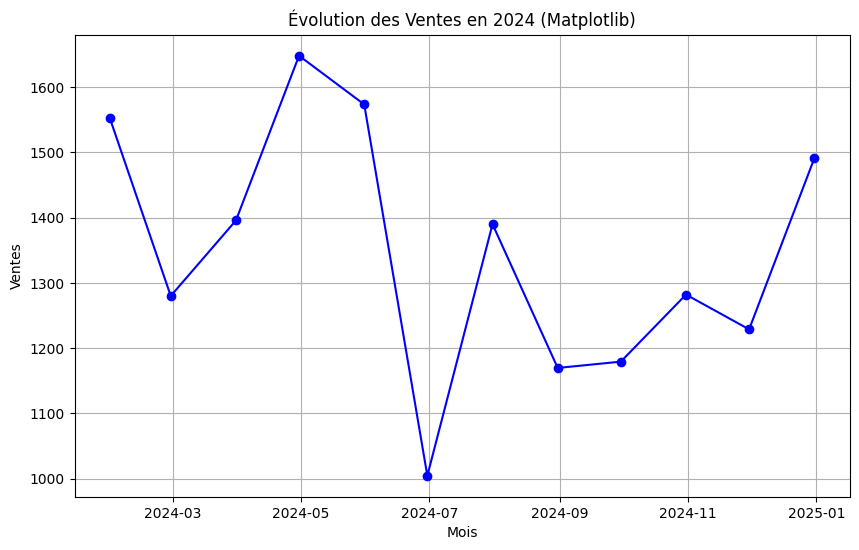

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Ventes'], marker='o', linestyle='-', color='b')
plt.title('Évolution des Ventes en 2024 (Matplotlib)')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.grid(True)
plt.show()

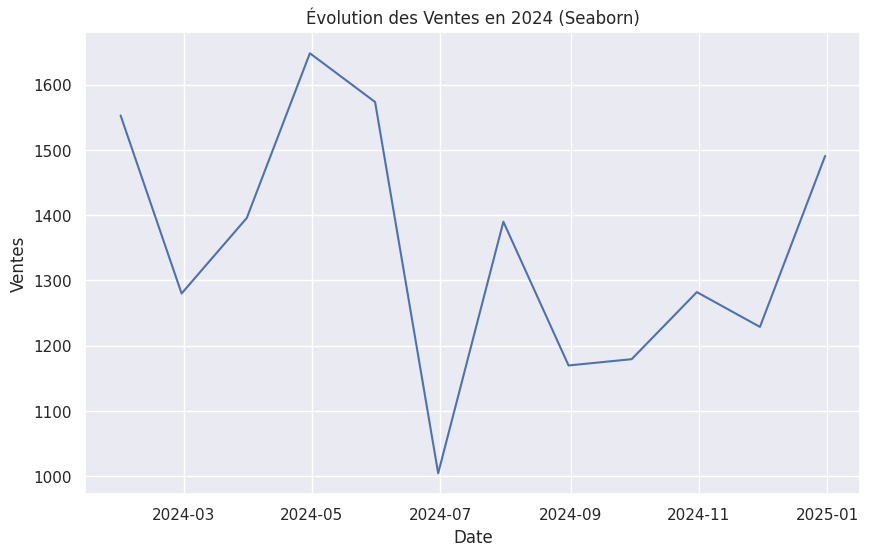

In [3]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid") # Application d'un style, qui va permettre d'avoir de bonnes combinaisons de couleurs
sns.lineplot(data=data, x='Date', y='Ventes') # nativement compatible avec Pandas, puisqu'on peut directement indiquer un dataframe
plt.title('Évolution des Ventes en 2024 (Seaborn)')
#plt.xlabel('Mois') # Pas besoin de préciser les axes, ils sont automatiquement repris par Seaborn
#plt.ylabel('Ventes') # Pas besoin de préciser les axes, ils sont automatiquement repris par Seaborn
#plt.grid(True)  # Pas besoin de préciser la grille, elle est automatiquement reprise
plt.show()

En dehors de cela, le fonctionnement entre Matplotlib et Seaborn est assez similaire. Voici la correspondance pour les graphiques que nous avons déjà vus avec Matplotlib :

<b>1. courbes </b>
- Matplotlib: plt.plot()
- Seaborn: sns.lineplot()

<b>2. Graphiques à Barres</b>
- Matplotlib: plt.bar() / plt.barh()
- Seaborn: sns.barplot()

<b>3. Histogrammes</b>
- Matplotlib: plt.hist()
- Seaborn: sns.histplot()

<b>4. Diagrammes de Dispersion (nuage en points)</b>
- Matplotlib :plt.scatter()
- Seaborn: sns.scatterplot()

<b>5. Graphiques en Aire</b>
- Matplotlib: plt.stackplot()
- Seaborn: sns.histplot() en utilisant l'option element='step' et fill=True

<h1> Seaborn et les thèmes </h1>

Seaborn propose plusieurs thèmes intégrés tels que darkgrid, whitegrid, dark, white, et ticks qui peuvent être appliqués globalement à tous les graphiques.

In [4]:
data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


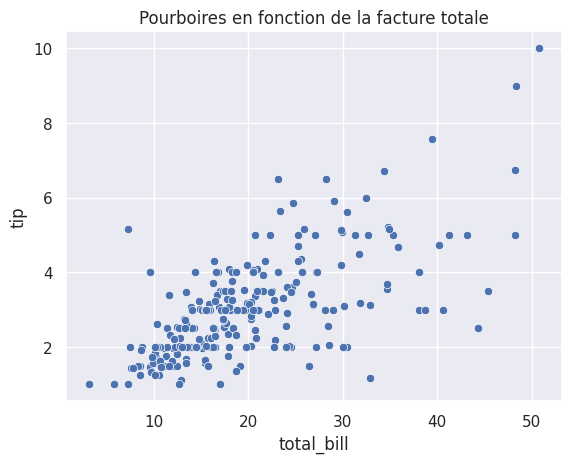

In [8]:
sns.set_theme(style="darkgrid")
sns.scatterplot(x="total_bill", y="tip", data=data)
plt.title("Pourboires en fonction de la facture totale")
plt.show()

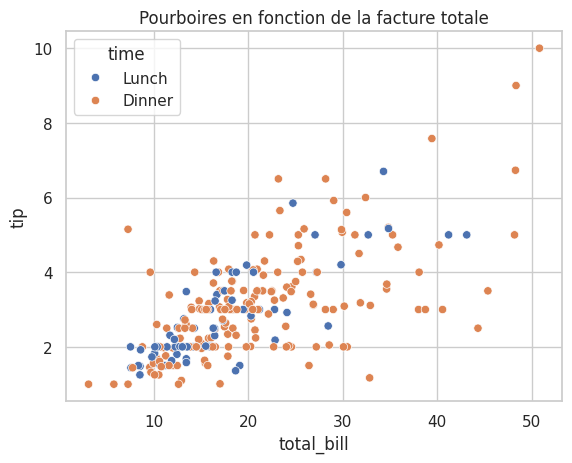

In [9]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x="total_bill", y="tip", data=data, hue="time")
plt.title("Pourboires en fonction de la facture totale")
plt.show()

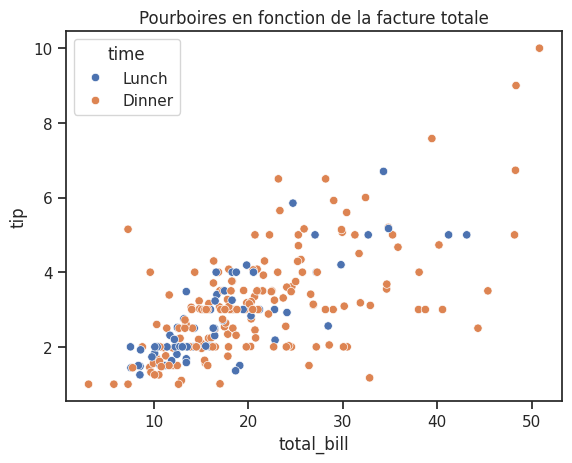

In [10]:
sns.set_theme(style="ticks")
sns.scatterplot(x="total_bill", y="tip", data=data, hue="time")
plt.title("Pourboires en fonction de la facture totale")
plt.show()

<b> Personnalisation d'un thème </b>

Vous pouvez personnaliser davantage l'apparence des graphiques en modifiant des paramètres tels que la palette de couleurs, la police, et d'autres aspects esthétiques :

1) style: "whitegrid"; "darkgrid", "white", "dark", et "ticks", chacune modifiant l'arrière-plan et la grille du graphique.

2) palette:  palettes de couleurs préconfigurées par Seaborn ."deep", "pastel", "bright", "dark", et "colorblind".

3) font : police d'écriture

4) font_scale : taille de la police

5) color_codes : lorsqu'il est défini sur True, permet à Seaborn de réassigner des couleurs couramment utilisées (comme 'b', 'g', 'r', 'c', 'm', 'y') à des teintes qui correspondent à la palette active.

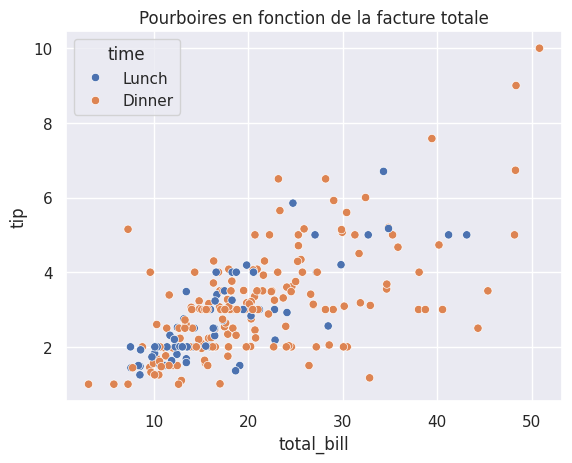

In [11]:
sns.set_theme()
sns.scatterplot(x="total_bill", y="tip", data=data, hue="time")
plt.title("Pourboires en fonction de la facture totale")
plt.show()

<h1> Visualisation de distributions avec Seaborn </h1>

<b> l'Histogramme </b>

Les histogrammes sont des graphiques qui permettent de visualiser la distribution des données numériques par le biais de binning ou de regroupement en plages (bins).

In [13]:
import pandas as pd

titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


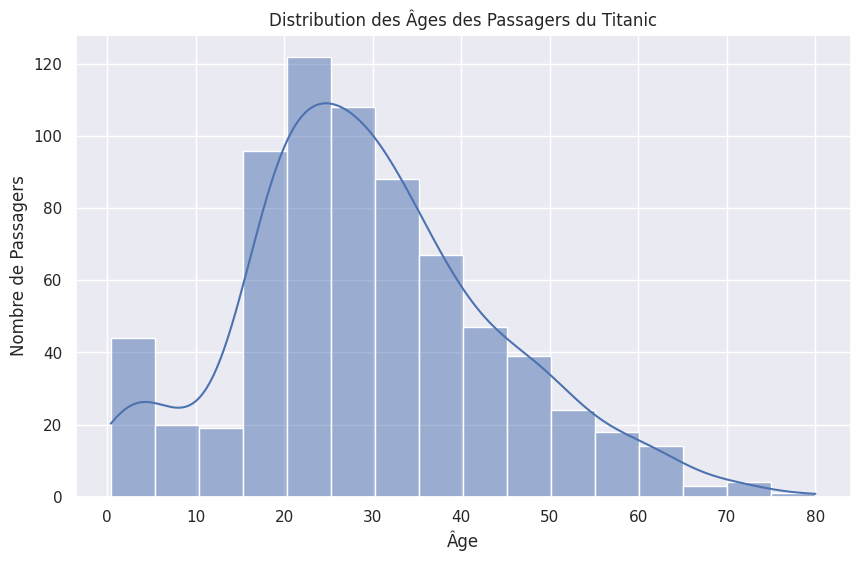

In [14]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.histplot(titanic['Age'], kde=True, binwidth=5)
#kde (Kernel Density Estimate) permet d'afficher une courbe en plus de l'hisrogramme (true/false)
#binwidth permet de définir des pas de chaque tranche de valeurs (2,5,10,20)
plt.title('Distribution des Âges des Passagers du Titanic')
plt.xlabel('Âge')
plt.ylabel('Nombre de Passagers')
plt.show()

<b> Afficher la distribution en fonction d'une catégorie </b>

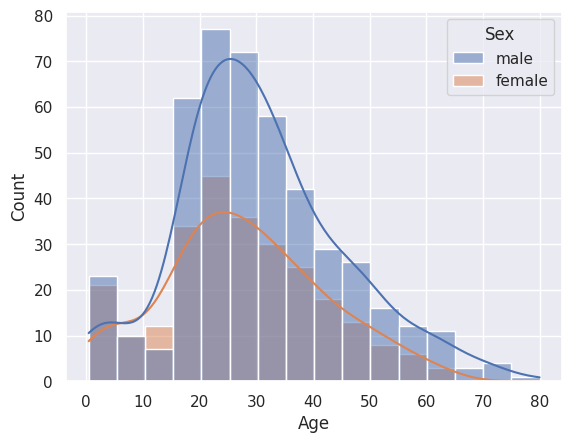

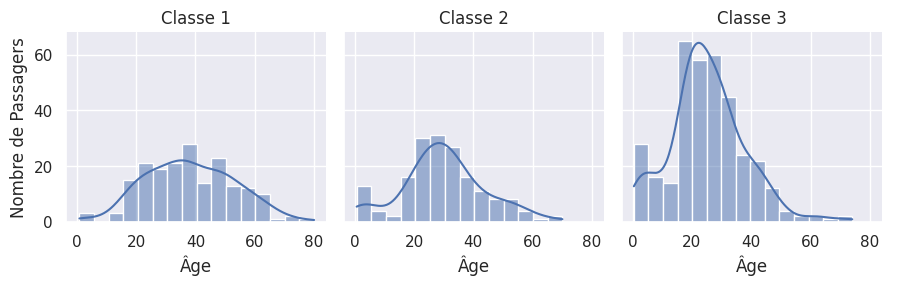

In [30]:
plt.figure()
sns.histplot(data=titanic,x='Age', kde=True, binwidth=5, hue='Sex')
#kde (Kernel Density Estimate) permet d'afficher une courbe en plus de l'hisrogramme (true/false)
g = sns.FacetGrid(titanic, col="Pclass")
g.map(sns.histplot, "Age", kde=True, binwidth=5)
g.add_legend()
g.set_titles('Classe {col_name}')
g.set_axis_labels('Âge', 'Nombre de Passagers')
plt.show()

<b> Affichage des box plot </b>

Les box plots, ou diagrammes en boîte, sont des visualisations pour représenter les distributions de données à travers leurs quartiles.

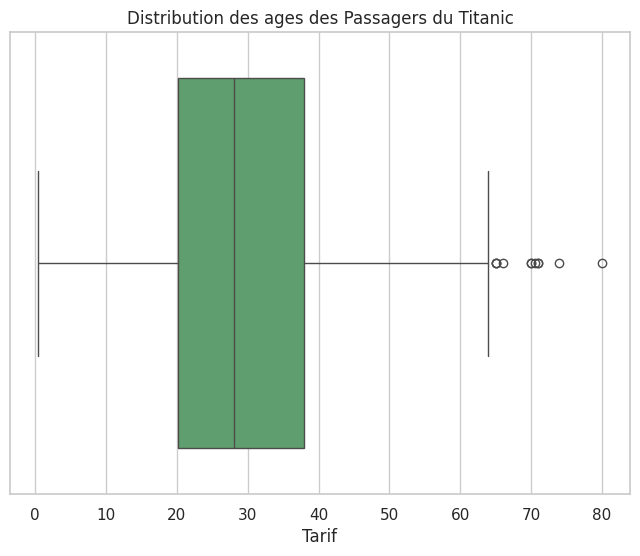

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=titanic['Age'], color="g")
plt.title('Distribution des ages des Passagers du Titanic')
plt.xlabel('Tarif')
plt.show()

<b>  Box Plot par Catégorie </b>

objectif : Créer un box plot pour comparer la distribution des ages par classe de cabine (Pclass).

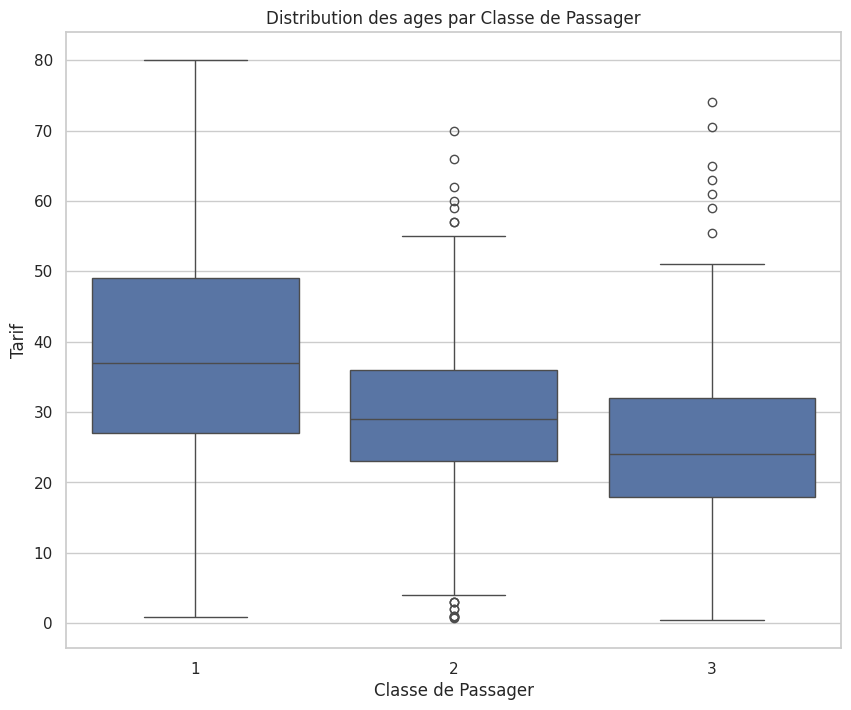

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Distribution des ages par Classe de Passager')
plt.xlabel('Classe de Passager')
plt.ylabel('Tarif')
plt.show()

<b> Box Plot avec Détail Catégorique </b>

Afficher les distributions des ages en utilisant à la fois la classe de passager et le sexe comme variables catégoriques.

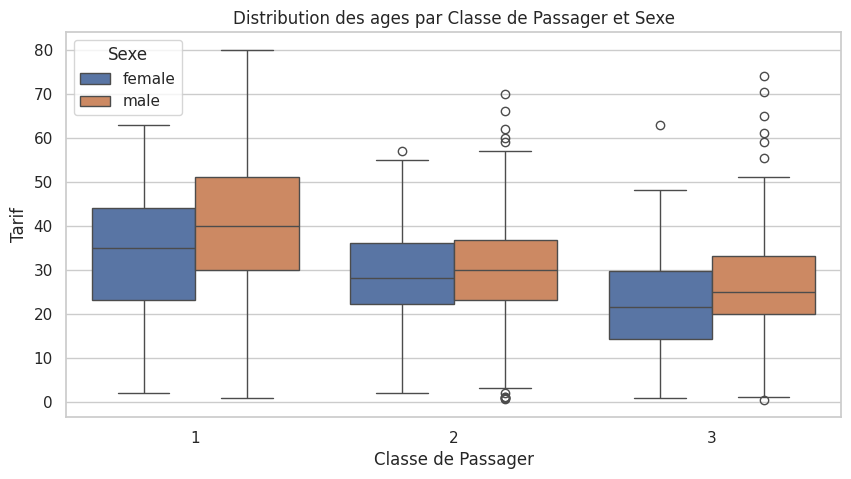

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic)
plt.title('Distribution des ages par Classe de Passager et Sexe')
plt.xlabel('Classe de Passager')
plt.ylabel('Tarif')
plt.legend(title='Sexe')
plt.show()

<b> Afficher des distributions avec des violon plots </b>

Les violon plots, ou diagrammes en forme de violon, combinent les boîtes à moustaches et les estimations de densité de noyau (KDE) :
Ils montrent non seulement les marqueurs de quartile comme les box plots, mais aussi la forme de la distribution des données.

Création d'un violon plot simple

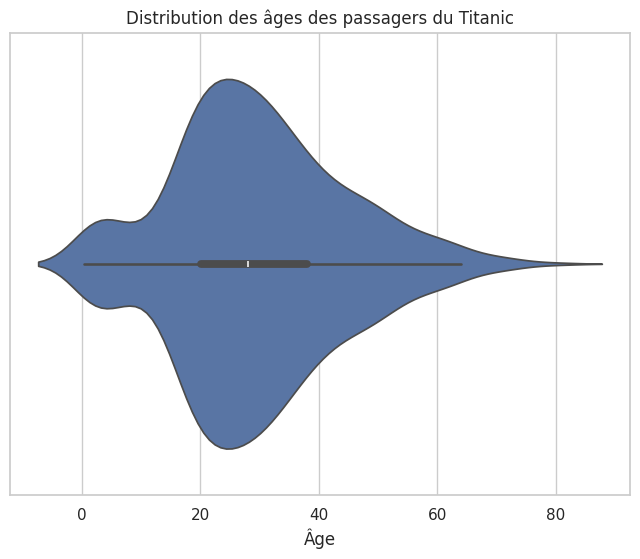

In [38]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=titanic['Age'])
plt.title('Distribution des âges des passagers du Titanic')
plt.xlabel('Âge')
plt.show()

Violon plot par catégorie

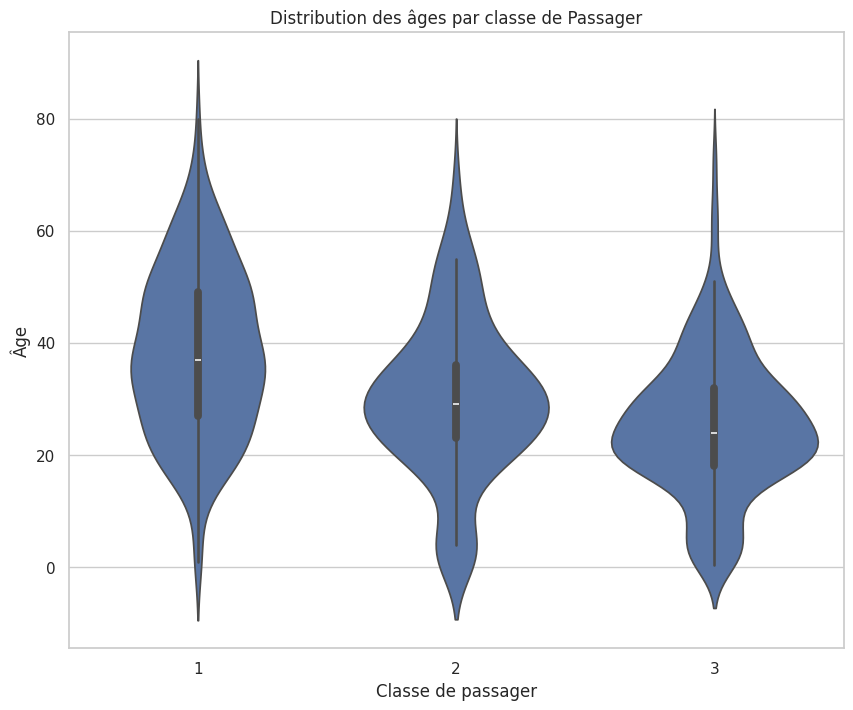

In [39]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Pclass', y='Age', data=titanic)
plt.title('Distribution des âges par classe de Passager')
plt.xlabel('Classe de passager')
plt.ylabel('Âge')
plt.show()

Afficher les distributions des ages en utilisant à la fois la classe de passager et le sexe comme variables catégoriques.

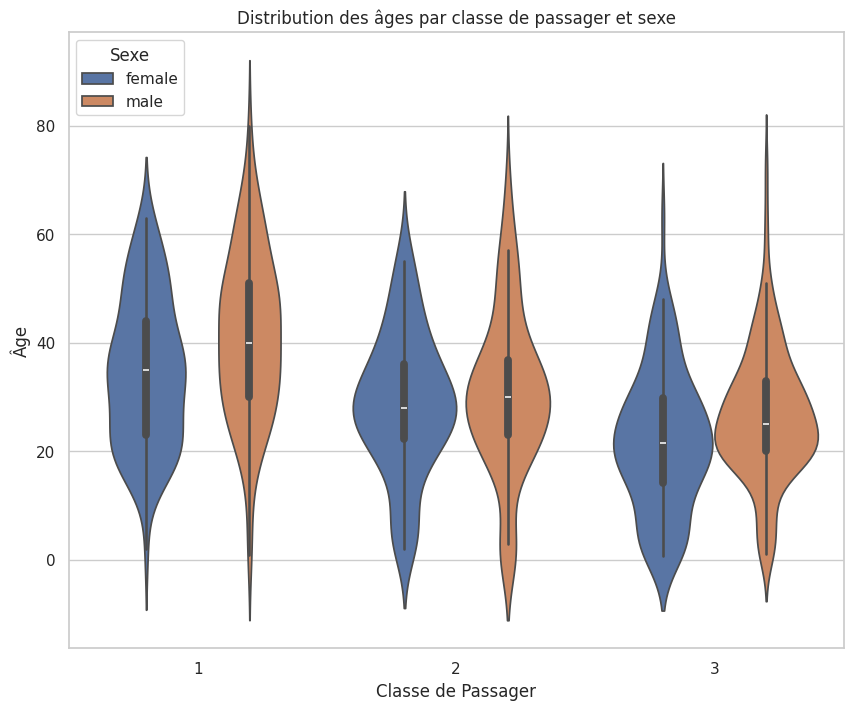

In [42]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Pclass',y='Age',hue='Sex',data=titanic) #le split permet d'avoir une seule visualisation pour les 2 sexes au lieu de 2 (comme pour les box plot)
plt.title('Distribution des âges par classe de passager et sexe')
plt.xlabel('Classe de Passager')
plt.ylabel('Âge')
plt.legend(title='Sexe')
plt.show()

<b> Les cartes de chaleur </b>

Les cartes de chaleur sont des visualisations graphiques qui montrent des données sous forme de grille où les couleurs représentent les niveaux des variables numériques. Elles sont souvent utilisées pour explorer la corrélation entre variables ou visualiser des matrices de données complexes.

In [43]:
# Préparer les données en nettoyant ou en transformant les variables non numériques si nécessaire
titanic_numeric = titanic.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).dropna()
correlation_matrix = titanic_numeric.corr()

# Afficher la matrice de corrélation
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


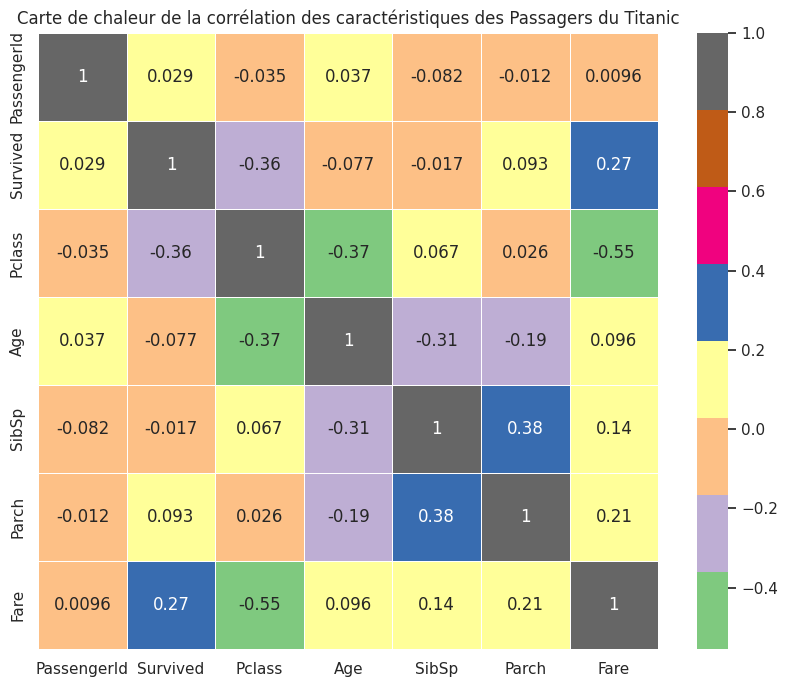

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Accent', linewidths=0.5)
plt.title('Carte de chaleur de la corrélation des caractéristiques des Passagers du Titanic')
plt.show()

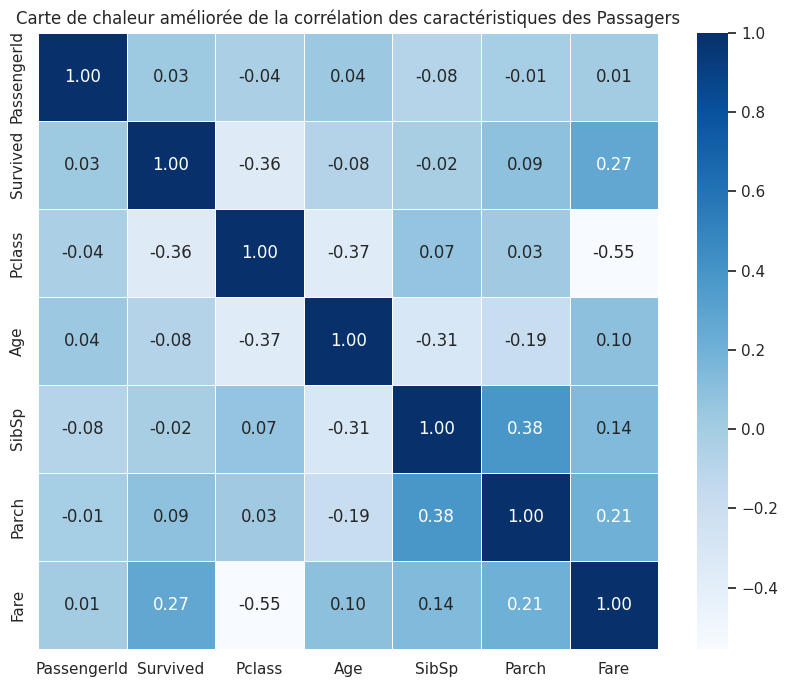

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues',fmt=".2f", linewidths=0.5)
plt.title('Carte de chaleur améliorée de la corrélation des caractéristiques des Passagers')
plt.show()

<h1> Excercice </h1>

Utiliser Seaborn pour créer un graphique en forme de violon qui illustre la distribution des tarifs des billets par classe de passager sur le Titanic, tout en différenciant les passagers selon leur statut de survie.

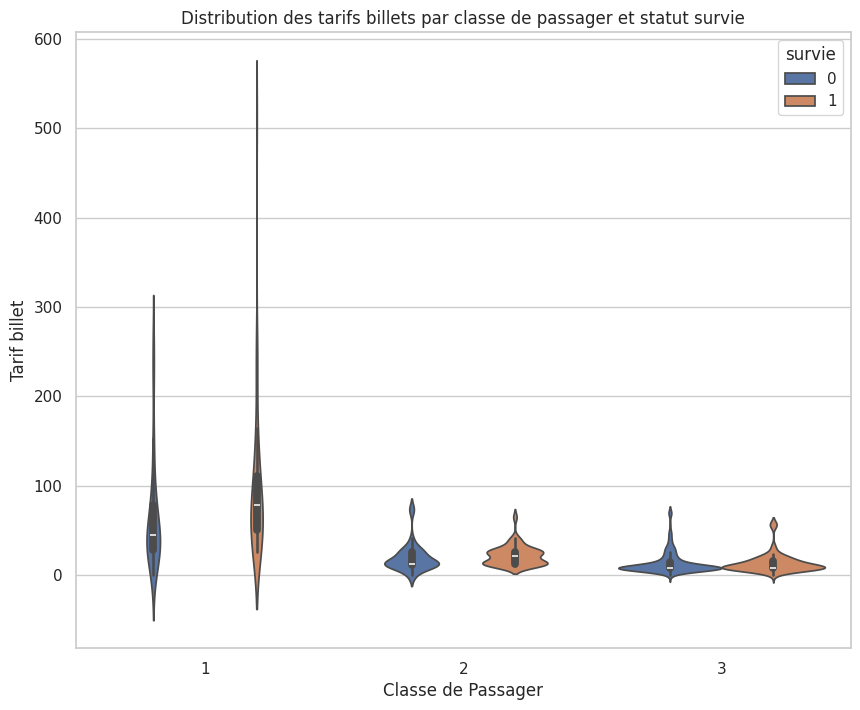

In [56]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Pclass',y='Fare',hue='Survived',data=titanic) #le split permet d'avoir une seule visualisation pour les 2 sexes au lieu de 2 (comme pour les box plot)
plt.title('Distribution des tarifs billets par classe de passager et statut survie')
plt.xlabel('Classe de Passager')
plt.ylabel('Tarif billet')
plt.legend(title='survie')
plt.show()